In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
census = pd.read_pickle("Intermediate Data/census_with_household.pkl")
census.head()

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489


In [3]:
#drop outlier
census_drop = census.drop(78712)
census_drop.head()

,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease
Zipcodes,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489


In [4]:
crime_2011 = pd.read_pickle("Intermediate Data/count_zipcode_type_2011.pkl")
crime_2011["Zip Code"] = crime_2011["Zip Code"].map("{:.0f}".format)
crime_2011.head()


,Zip Code,Highest Offense Description,Number of Occurances
0,78610,APPLIC TO REVOKE PROBATION,2
1,78610,BURGLARY OF VEHICLE,1
2,78610,CUSTODY ARREST TRAFFIC WARR,2
3,78610,HARASSMENT,1
4,78610,THEFT,1


In [5]:
crime_2016 = pd.read_pickle("Intermediate Data/count_zipcode_type_2016.pkl")
crime_2016["Zip Code"] = crime_2016["Zip Code"].map("{:.0f}".format)
crime_2016.head()

,Zip Code,Highest Offense Description,Number of Occurances
0,78610,DAMAGE CITY PROP,1
1,78610,DWI .15 BAC OR ABOVE,1
2,78610,FAILURE TO IDENTIFY,1
3,78610,TERRORISTIC THREAT,1
4,78613,AGG ROBBERY/DEADLY WEAPON,1


In [6]:
crime_2011_zipcodes = crime_2011["Zip Code"].unique()
len(crime_2011_zipcodes)

53

In [7]:
crime_2016_zipcodes = crime_2016["Zip Code"].unique()
len(crime_2016_zipcodes)

52

In [8]:
zipcode_difference = list(set(crime_2011_zipcodes)-set(crime_2016_zipcodes))
zipcode_difference

['78640']

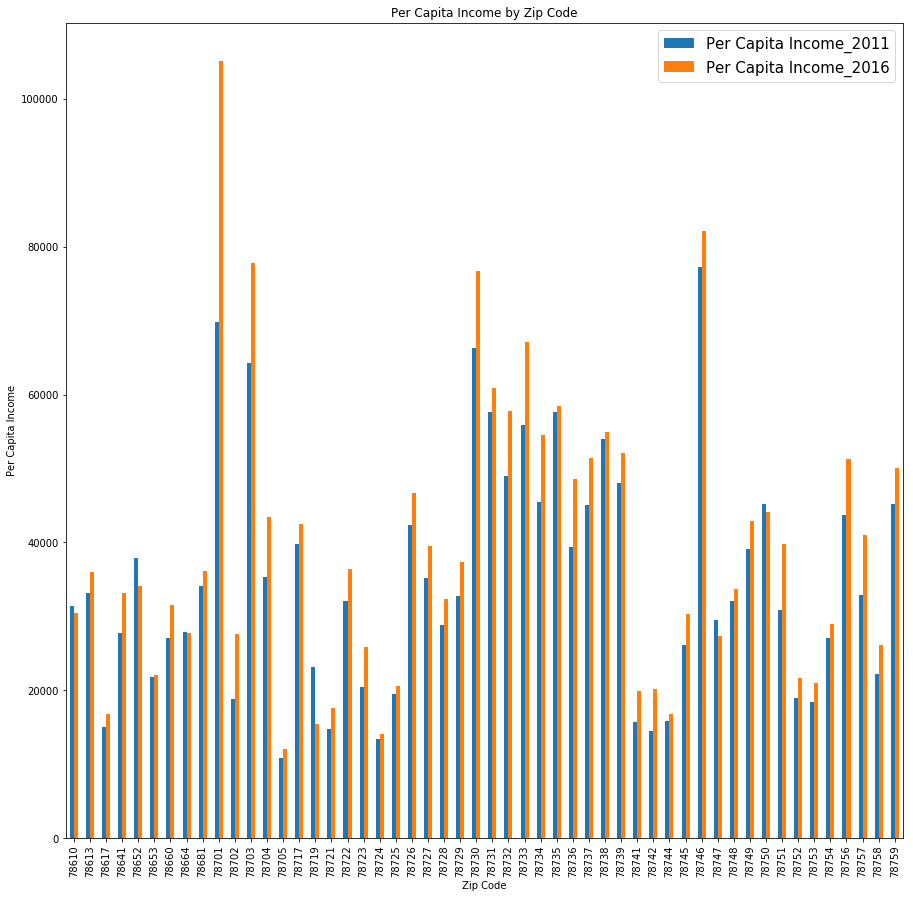

In [9]:
income_by_year = census_drop.plot(kind='bar',y=["Per Capita Income_2011","Per Capita Income_2016"], figsize=(15,15), fontsize=10)
income_by_year.set_ylabel("Per Capita Income")
income_by_year.set_xlabel("Zip Code")
plt.title("Per Capita Income by Zip Code") 
income_by_year.legend(prop={'size': 15})
plt.savefig("Images/incomebyyear.png")

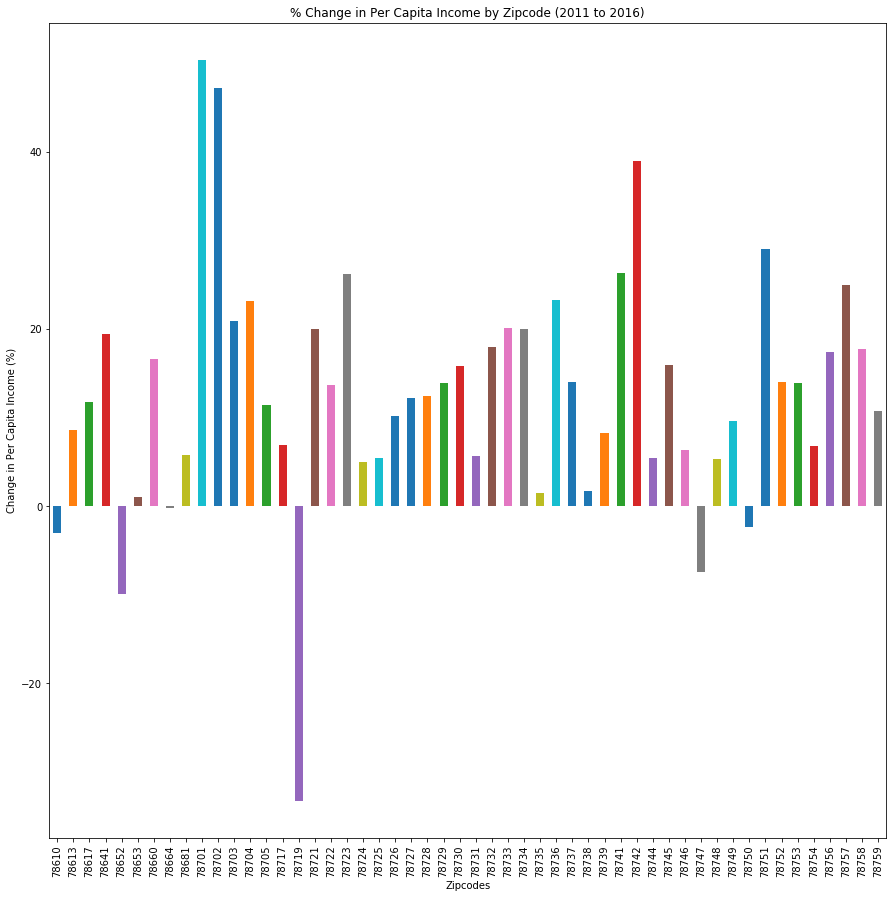

In [10]:
compare_pc_income_percent = census_drop.plot(kind="bar", y="PC % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Per Capita Income by Zipcode (2011 to 2016)")
compare_pc_income_percent.set_ylabel("Change in Per Capita Income (%)")
compare_pc_income_percent
plt.savefig("Images/PCIncomeChangePercent.png")

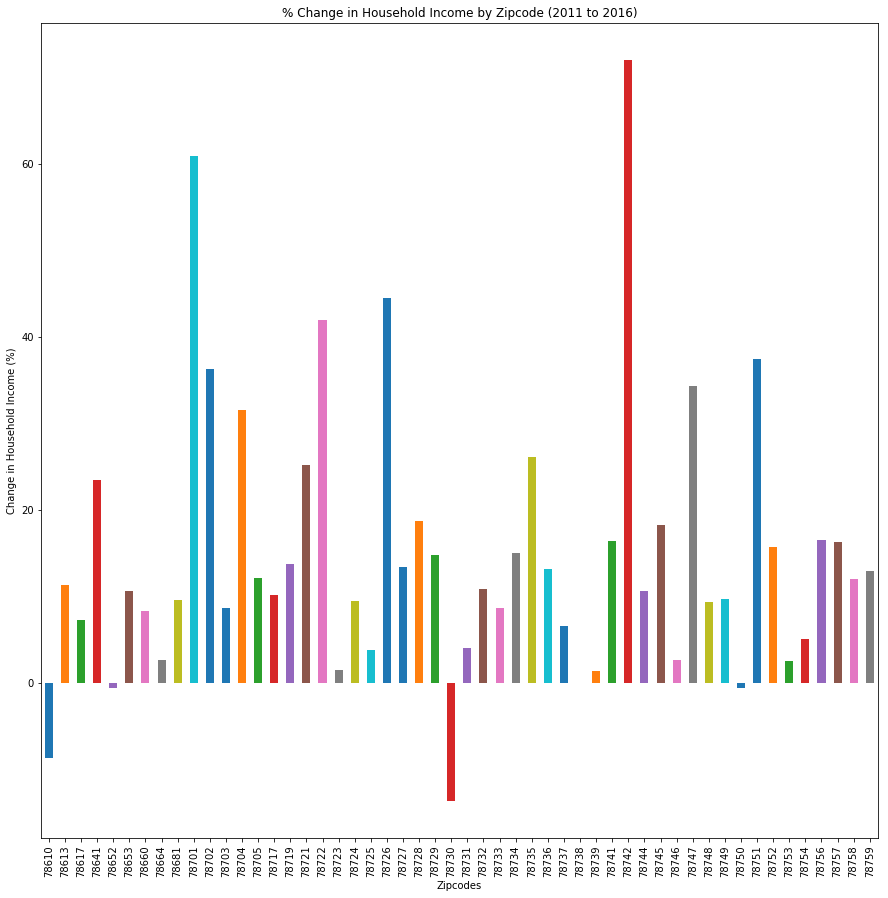

In [11]:
compare_hh_income_percent = census_drop.plot(kind="bar", y="HH % Income Increase/Decrease", figsize=(15,15), fontsize=10, legend=False, title="% Change in Household Income by Zipcode (2011 to 2016)")
compare_hh_income_percent.set_ylabel("Change in Household Income (%)")
compare_hh_income_percent
plt.savefig("Images/HHIncomeChangePercent.png")

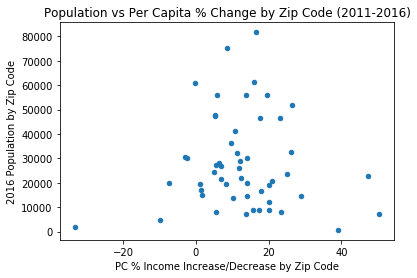

In [12]:
# no significant correlation between Population and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Population_2016")
plt.title("Population vs Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Population by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
plt.savefig("Images/PCIncomeChangePopulation.png")
plt.show()

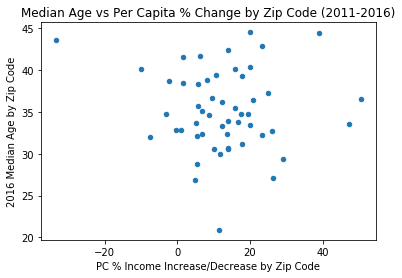

In [13]:
# no significant correlation between Median Age and PC % Income Increase/Decrease
census_drop.plot(kind="scatter", x="PC % Income Increase/Decrease", y="Median Age_2016")
plt.title("Median Age vs Per Capita % Change by Zip Code (2011-2016)")
plt.ylabel("2016 Median Age by Zip Code")
plt.xlabel("PC % Income Increase/Decrease by Zip Code")
plt.savefig("Images/PCIncomeChangeAge.png")
plt.show()

In [14]:
#merge crime dataframes
crime_2011_groupby = crime_2011.groupby("Zip Code")
crime_2011_sum = crime_2011_groupby["Number of Occurances"].sum()
crime_2016_groupby = crime_2016.groupby("Zip Code")
crime_2016_sum = crime_2016_groupby["Number of Occurances"].sum()
crime = pd.DataFrame({
    "Number of Offenses 2011": crime_2011_sum,
    "Number of Offenses 2016": crime_2016_sum,
    "Difference (2011-2016)": crime_2011_sum - crime_2016_sum
})

crime.index.name = "Zipcode"

In [15]:

crime_narrowed = pd.read_pickle("Intermediate Data/crime_2011_2016.pkl")
crime_drop = pd.read_pickle("Intermediate Data/filtered_crime_df.pkl")

crime_narrowed_2011 = crime_drop.loc[crime_narrowed["Year"] == 2011]
crime_count_2011 = crime_narrowed_2011["Zip Code"].value_counts()

crime_narrowed_2016 = crime_drop.loc[crime_narrowed["Year"] == 2016]
crime_count_2016 = crime_narrowed_2016["Zip Code"].value_counts()


In [16]:
zipcode_2011 = crime_narrowed_2011["Zip Code"].unique()
zipcode_2016 = crime_narrowed_2016["Zip Code"].unique()
print(len(zipcode_2011))
print(len(zipcode_2016))
zipcode_difference = list(set(zipcode_2011)-set(zipcode_2016))
print(zipcode_difference)

53
52
['78640']


In [17]:
crime_narrowed_2011_drop = crime_narrowed_2011.drop(1394611)
crime_count_2011_drop = crime_narrowed_2011_drop["Zip Code"].value_counts()
df_crime_count = pd.DataFrame({
    "2011": crime_count_2011_drop,
    "2016": crime_count_2016,
    "Change": crime_count_2016 - crime_count_2011_drop,
})

df_crime_count.index.name="Zipcode"


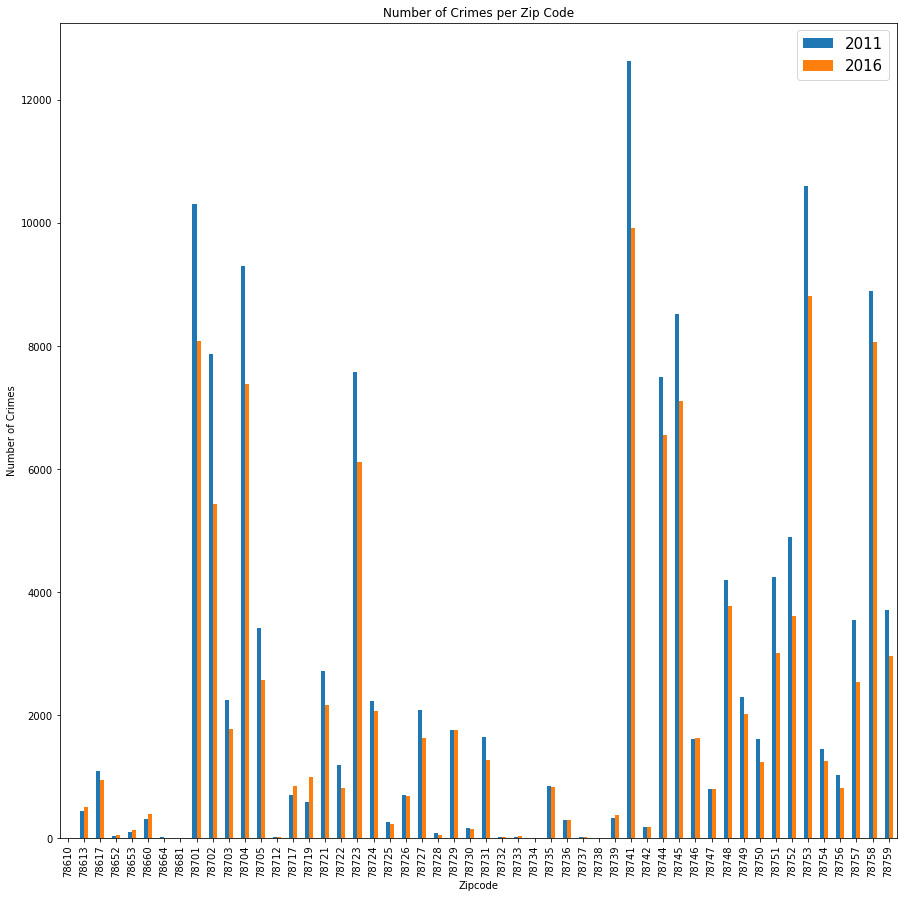

In [18]:
crime_by_year = df_crime_count.plot(kind='bar',y=["2011","2016"], figsize=(15,15), fontsize=10)
crime_by_year.set_ylabel("Number of Crimes")
crime_by_year.legend(prop={'size': 15})
plt.title("Number of Crimes per Zip Code")
plt.savefig("Images/CrimeCount.png")

In [19]:
df_crime_count.index = df_crime_count.index.astype(int)
crime_census = census
crime_census["Crime Count 2011"] = df_crime_count["2011"]
crime_census["Crime Count 2016"] = df_crime_count["2016"]
crime_census["Change in Crime"] = df_crime_count["Change"]
crime_census["% Change in Crime"] = df_crime_count["Change"]/df_crime_count["2011"]*100
crime_census["Population Change"] = crime_census["Population_2016"] - crime_census["Population_2011"]
crime_census["% Population Change"] = crime_census["Population Change"]/crime_census["Population_2011"]*100
crime_census.head()


,Population_2011,Median Age_2011,Household Income_2011,Per Capita Income_2011,Population_2016,Median Age_2016,Household Income_2016,Per Capita Income_2016,PC Income Increase/Decrease,PC % Income Increase/Decrease,HH Income Increase/Decrease,HH % Income Increase/Decrease,Crime Count 2011,Crime Count 2016,Change in Crime,% Change in Crime,Population Change,% Population Change
Zipcodes,,,,,,,,,,,,,,,,,,
78610,22052.0,35.9,82702.0,31356.0,30452.0,34.7,75453.0,30388.0,-968.0,-3.087128,-7249.0,-8.765205,7.0,4.0,-3.0,-42.857143,8400.0,38.091783
78613,63901.0,33.9,81819.0,33101.0,75279.0,34.6,91033.0,35957.0,2856.0,8.628138,9214.0,11.261443,439.0,505.0,66.0,15.034169,11378.0,17.805668
78617,18572.0,28.8,44334.0,14975.0,26126.0,30.0,47551.0,16737.0,1762.0,11.766277,3217.0,7.256282,1093.0,941.0,-152.0,-13.906679,7554.0,40.674133
78641,43655.0,32.2,67683.0,27738.0,55933.0,34.8,83526.0,33138.0,5400.0,19.467878,15843.0,23.407650,NaN,NaN,NaN,NaN,12278.0,28.125072
78652,4256.0,39.1,79107.0,37908.0,4919.0,40.1,78594.0,34131.0,-3777.0,-9.963596,-513.0,-0.648489,33.0,45.0,12.0,36.363636,663.0,15.578008


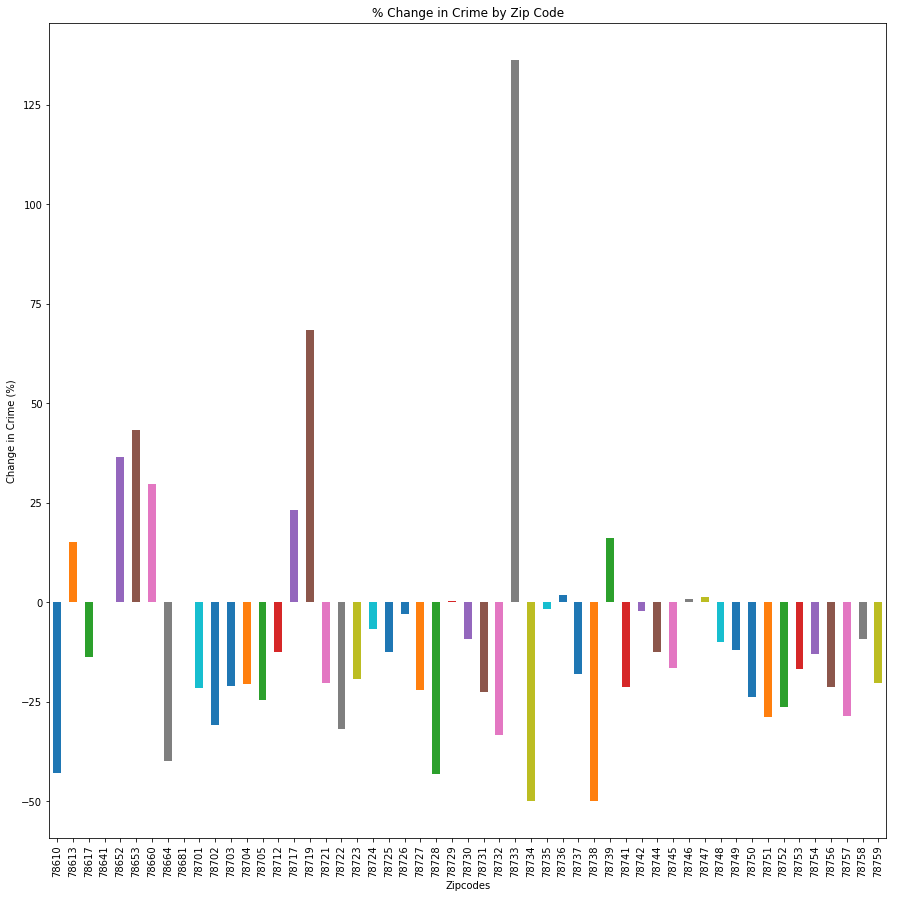

In [20]:
crime_change = crime_census.plot(kind="bar", y="% Change in Crime", figsize=(15,15), fontsize=10, legend=False, title="% Change in Household Income by Zipcode (2011 to 2016)")
crime_change.set_ylabel("Change in Crime (%)")
plt.title("% Change in Crime by Zip Code")
plt.savefig("Images/crimechangebyzip.png")

Text(0.5, 0, '% Change in Per Capita Income')

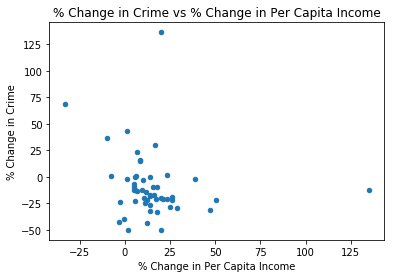

In [21]:
crime_census.plot(kind='scatter', x='PC % Income Increase/Decrease', y="% Change in Crime")
plt.title("% Change in Crime vs % Change in Per Capita Income")
plt.xlabel("% Change in Per Capita Income")

Text(0.5, 0, '% Change in Household Income')

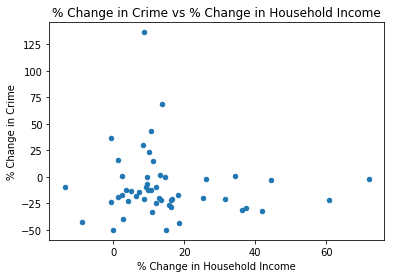

In [22]:
crime_census.plot(kind='scatter', x='HH % Income Increase/Decrease', y="% Change in Crime")
plt.title("% Change in Crime vs % Change in Household Income")
plt.xlabel("% Change in Household Income")

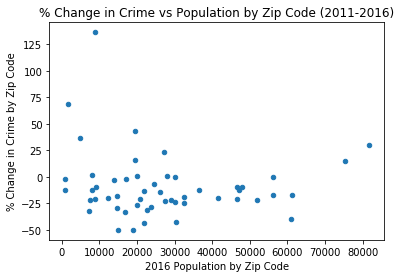

In [23]:
crime_census.plot(kind="scatter", y="% Change in Crime", x="Population_2016")
plt.title("% Change in Crime vs Population by Zip Code (2011-2016)")
plt.xlabel("2016 Population by Zip Code")
plt.ylabel("% Change in Crime by Zip Code")
plt.savefig("Images/CrimePopulation.png")
plt.show()

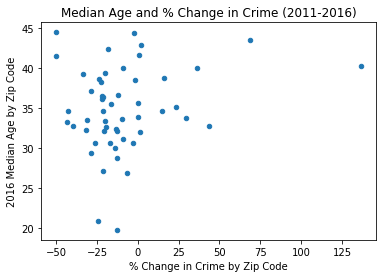

In [24]:
crime_census.plot(kind="scatter", x="% Change in Crime", y="Median Age_2016")
plt.title("Median Age and % Change in Crime (2011-2016)")
plt.ylabel("2016 Median Age by Zip Code")
plt.xlabel("% Change in Crime by Zip Code")
plt.savefig("Images/CrimeAge.png")
plt.show()

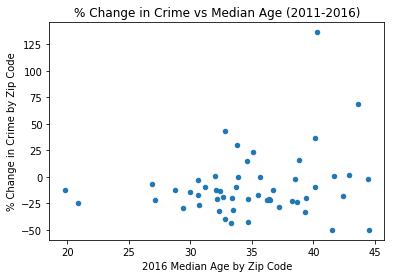

In [25]:
crime_census.plot(kind="scatter", y="% Change in Crime", x="Median Age_2016")
plt.title("% Change in Crime vs Median Age (2011-2016)")
plt.xlabel("2016 Median Age by Zip Code")
plt.ylabel("% Change in Crime by Zip Code")
plt.savefig("Images/CrimeAge.png")
plt.show()

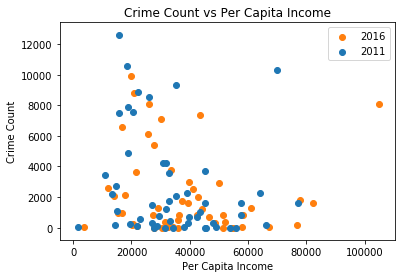

In [26]:
plt.scatter(y=crime_census["Crime Count 2016"],x=crime_census["Per Capita Income_2016"], color='C1', label='2016')
plt.scatter(y=crime_census["Crime Count 2011"],x=crime_census["Per Capita Income_2011"], color='C0', label='2011')
plt.legend()

plt.title("Crime Count vs Per Capita Income")
plt.xlabel("Per Capita Income")
plt.ylabel("Crime Count")
plt.savefig("Images/crime_pcincome.png")
plt.show()


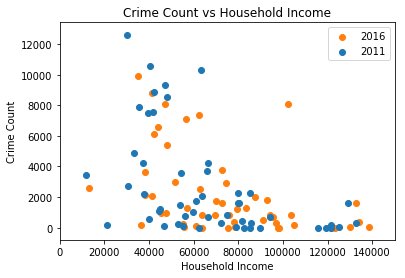

In [27]:
plt.scatter(y=crime_census["Crime Count 2016"],x=crime_census["Household Income_2016"], color='C1', label='2016')
plt.scatter(y=crime_census["Crime Count 2011"],x=crime_census["Household Income_2011"], color='C0', label='2011')
plt.legend()
plt.xlim(0,150000)
plt.title("Crime Count vs Household Income")
plt.xlabel("Household Income")
plt.ylabel("Crime Count")
plt.savefig("Images/crime_hhincome.png")
plt.show()